In [30]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [6]:
import pooch

In [21]:
data = sc.read_csv('./Task 5/test_data.tsv', delimiter='\t')
data

AnnData object with n_obs × n_vars = 34812 × 10

In [26]:
data.obs_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '34802', '34803', '34804', '34805', '34806', '34807', '34808', '34809',
       '34810', '34811'],
      dtype='object', length=34812)

In [3]:
df = pd.read_csv('./Task 5/test_data.tsv', sep='\t', index_col=0)
df.head()

,FSC-A,SSC-A,HLA-DR,CD3,CD45,CD14,CD56,CD19,CD11c
6,1.501749,0.526060,3.523124,1.485025,4.788795,5.483128,-0.314870,1.000637,3.304998
7,0.848230,0.105850,4.921549,-1.726940,5.253668,0.333739,0.342336,5.876312,1.362900
11,1.546926,0.406637,4.981942,1.047433,5.358941,5.631640,0.155462,0.905064,4.506790
16,1.697505,0.291444,5.583107,4.706273,5.912384,0.882935,0.353881,5.494634,-1.550571
17,1.248090,0.245040,5.429337,2.404481,5.351980,3.329632,0.333889,1.306445,4.934134


In [32]:
# example of a standardization
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)

In [33]:
scaled

array([[ 1.49063011,  2.56610641,  0.85235287, ..., -0.62332536,
        -0.09477076,  1.80584222],
       [-0.31361914, -0.41509638,  1.54149618, ..., -0.06345961,
         2.03701738,  0.5169161 ],
       [ 1.61535723,  1.718855  ,  1.57125769, ..., -0.22265532,
        -0.13655798,  2.60344429],
       ...,
       [-0.56386797, -0.25064857, -0.7334101 , ..., -0.14883785,
        -0.84150611, -0.46785091],
       [-0.50966157, -0.54828176, -0.88047551, ..., -0.26119455,
        -0.62495481, -0.99965034],
       [ 0.57811465,  0.78939884,  1.54681578, ..., -1.15543718,
        -0.30686424,  2.8012022 ]])

In [36]:
pca = PCA(n_components=3)
pca_res = pca.fit_transform (scaled)

df['pca-one'] = pca_res[:,0]
df['pca-two'] = pca_res[:,1] 
#df['pca-three'] = pca_res[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.34097485 0.23204841 0.16503994]


C:\Users\glitc\AppData\Local\Temp\ipykernel_18460\1314780729.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='pca-one', ylabel='pca-two'>

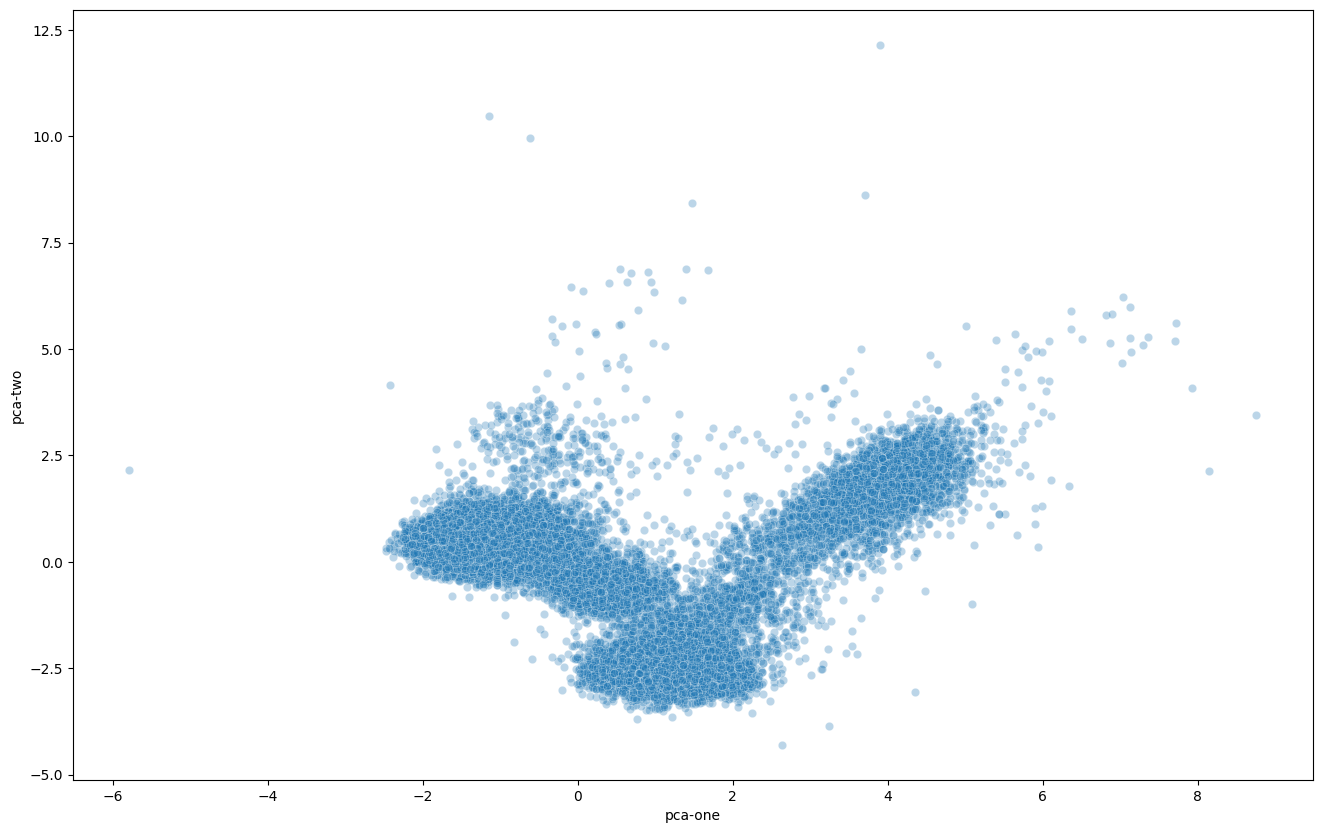

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[df['pca-one'] < 50],
    legend="full",
    alpha=0.3
)